Dataset Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

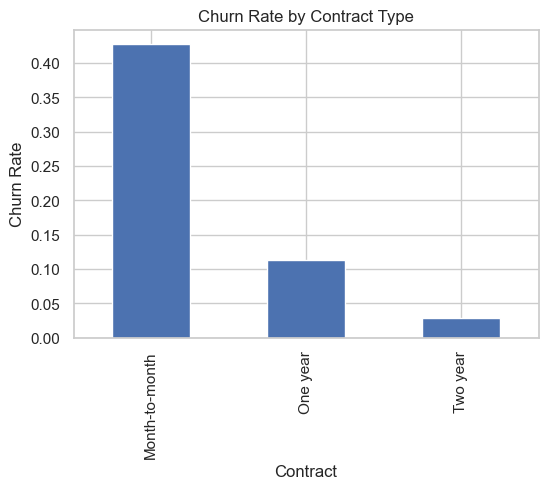

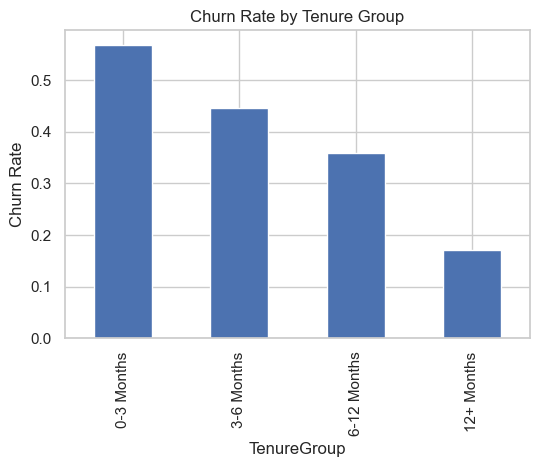

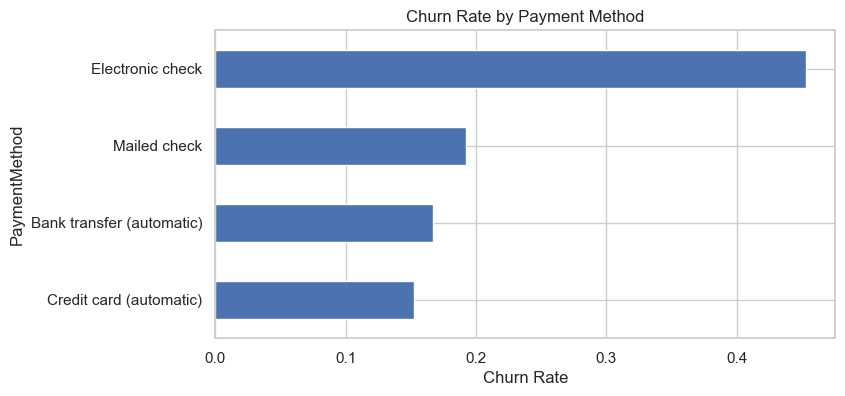

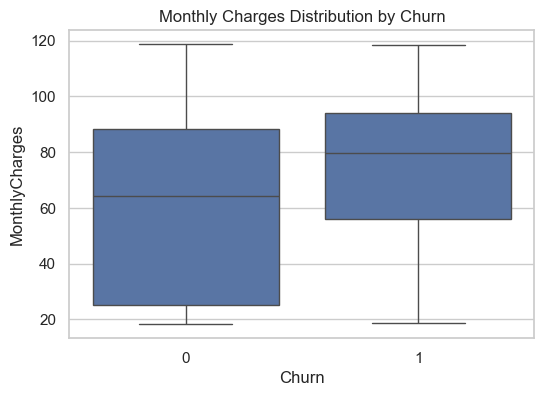

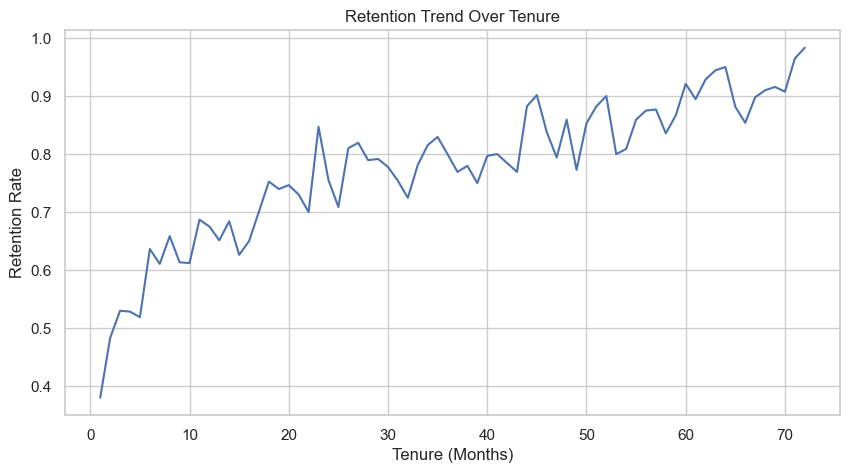


===== MODEL PERFORMANCE =====
[[923 110]
 [179 195]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



C:\Users\Irene Rachel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# CUSTOMER CHURN ANALYSIS
# Telco Customer Churn Dataset
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style="whitegrid")
# 2. Load Dataset
df = pd.read_csv(r"C:\Users\Irene Rachel\Documents\telco churn.csv")
print("Dataset Shape:", df.shape)
print(df.head())
# 3. Data Cleaning
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop missing values
df.dropna(inplace=True)
# Convert Churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
print("\nAfter Cleaning Shape:", df.shape)
# 4. Core Business Metrics
total_customers = len(df)
churned_customers = df['Churn'].sum()
churn_rate = churned_customers / total_customers
retention_rate = 1 - churn_rate
print("\n===== BUSINESS METRICS =====")
print("Total Customers:", total_customers)
print("Churned Customers:", churned_customers)
print("Churn Rate: {:.2%}".format(churn_rate))
print("Retention Rate: {:.2%}".format(retention_rate))
# Average Revenue Per User
arpu = df['MonthlyCharges'].mean()
# Revenue lost due to churn
revenue_lost = df[df['Churn'] == 1]['MonthlyCharges'].sum()
print("Average Monthly Revenue per User (ARPU):", round(arpu,2))
print("Estimated Monthly Revenue Lost due to Churn:", round(revenue_lost,2))
# Estimated Average Customer Lifetime
average_lifetime = 1 / churn_rate
print("Estimated Average Customer Lifetime (months):", round(average_lifetime,2))
# 5. Tenure Bucketing
def tenure_group(tenure):
    if tenure <= 3:
        return "0-3 Months"
    elif tenure <= 6:
        return "3-6 Months"
    elif tenure <= 12:
        return "6-12 Months"
    else:
        return "12+ Months"
df['TenureGroup'] = df['tenure'].apply(tenure_group)
# 6. Churn by Segments
print("\n===== CHURN BY CONTRACT =====")
print(df.groupby('Contract')['Churn'].mean())
print("\n===== CHURN BY TENURE GROUP =====")
print(df.groupby('TenureGroup')['Churn'].mean())
print("\n===== CHURN BY PAYMENT METHOD =====")
print(df.groupby('PaymentMethod')['Churn'].mean())
# 7. Visualizations
plt.figure(figsize=(6,4))
df.groupby('Contract')['Churn'].mean().plot(kind='bar')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()
plt.figure(figsize=(6,4))
df.groupby('TenureGroup')['Churn'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.show()
plt.figure(figsize=(8,4))
df.groupby('PaymentMethod')['Churn'].mean().sort_values().plot(kind='barh')
plt.title("Churn Rate by Payment Method")
plt.xlabel("Churn Rate")
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn")
plt.show()
# 8. Cohort-Style Retention Trend
cohort_data = df.groupby('tenure')['Churn'].mean()
plt.figure(figsize=(10,5))
plt.plot(cohort_data.index, 1 - cohort_data.values)
plt.title("Retention Trend Over Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Retention Rate")
plt.show()
# 9. Logistic Regression Model
# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
# Define Features & Target
X = df_encoded.drop(['customerID','Churn'], axis=1)
y = df_encoded['Churn']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
print("\n===== MODEL PERFORMANCE =====")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
